<a href="https://colab.research.google.com/github/Quizoo20/Projet_IA/blob/main/Projet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Bienvenue dans Colab !</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Nouveau&#41; Essayez l'API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


# Bureau d'étude machine learning


## Système d'évaluation des risques pour conducteurs

I. Import des packages

In [11]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Modèle choisi
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

II. Lecture des données

In [ ]:
#df = pd.read_csv('features_14.csv')
df = pd.read_csv('sensor_raw.csv')      # Il faudra peut être re importer les fichiers dans le cas où on a pas enregistré sur github

df.info()
#df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Target(Class)  1114 non-null   int64  
 1   GyroX          1114 non-null   float64
 2   GyroY          1114 non-null   float64
 3   GyroZ          1114 non-null   float64
 4   AccX           1114 non-null   float64
 5   AccY           1114 non-null   float64
 6   AccZ           1114 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 61.1 KB


III. Nettoyage de données

In [ ]:
df = df.drop_duplicates()

df = df.dropna()

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number')  # Colonnes numériques
    for col in numeric_cols.columns:
        Q1 = df[col].quantile(0.25)  # 1er quartile
        Q3 = df[col].quantile(0.75)  # 3e quartile
        IQR = Q3 - Q1                # Écart interquartile
        # Définir les bornes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrer les valeurs dans les bornes
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df_cleaned = remove_outliers_iqr(df)
colonne = df_cleaned.columns[5]

,Target(Class),GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,1,-0.923664,3.694656,0.824427,0.162598,-0.086670,-0.969482
1,1,-0.908397,4.534351,0.832061,0.175781,-0.100586,-1.013184
2,1,0.786260,3.969466,0.587786,0.322754,-0.140381,-0.911621
3,1,0.335878,4.564885,-0.251908,0.480225,-0.226807,-0.936768
4,1,3.351145,2.694656,-0.106870,0.426025,-0.253906,-0.950195
...,...,...,...,...,...,...,...
1108,4,3.396947,4.427481,1.351145,0.183594,-0.040527,-0.910645
1110,4,-0.435115,5.396947,1.282443,0.459961,-0.227051,-0.967041
1111,4,-1.061069,4.534351,1.183206,0.419189,-0.192871,-1.002686
1112,4,-1.015267,5.259542,0.656489,0.308838,-0.090088,-1.023193


IV. Analyse univariée

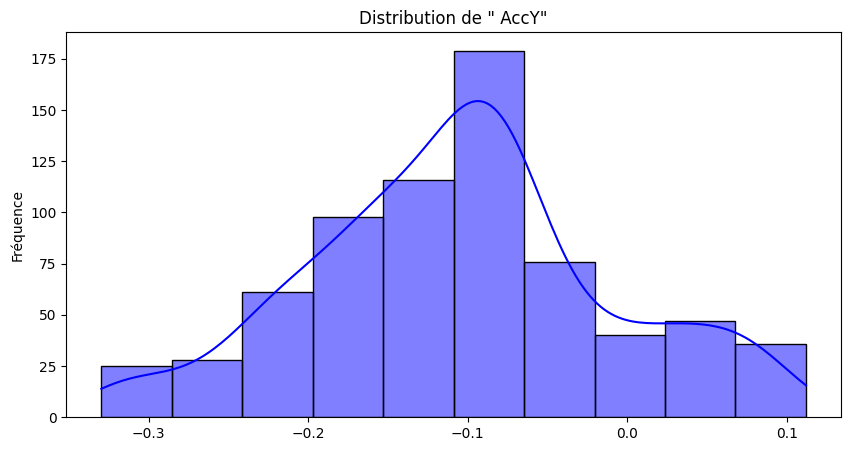

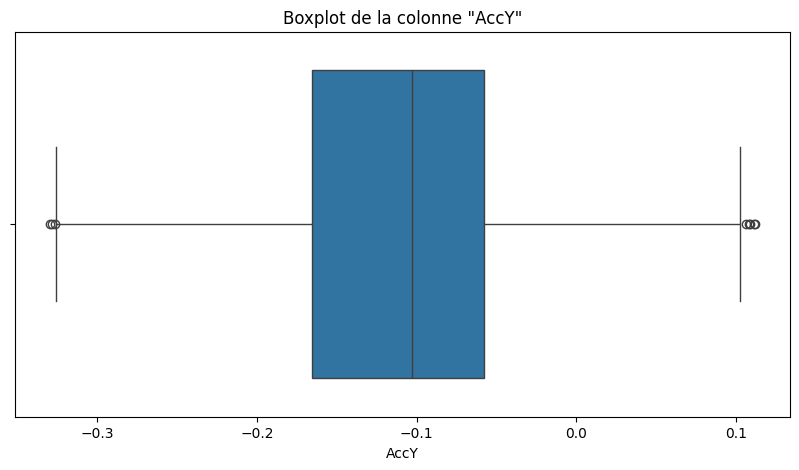

In [ ]:
# Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned[colonne].dropna(), kde=True, bins=10, color='blue')
plt.title(f'Distribution de " {colonne}"')
plt.xlabel('')
plt.ylabel('Fréquence')
plt.show()

#Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned[colonne])
plt.title(f'Boxplot de la colonne "{colonne}"')
plt.show()


V. Analyse Bivariée

          GyroX     GyroZ
GyroX  1.000000 -0.062431
GyroZ -0.062431  1.000000


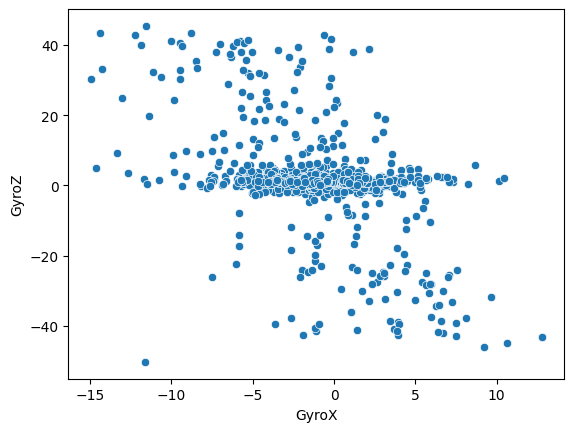

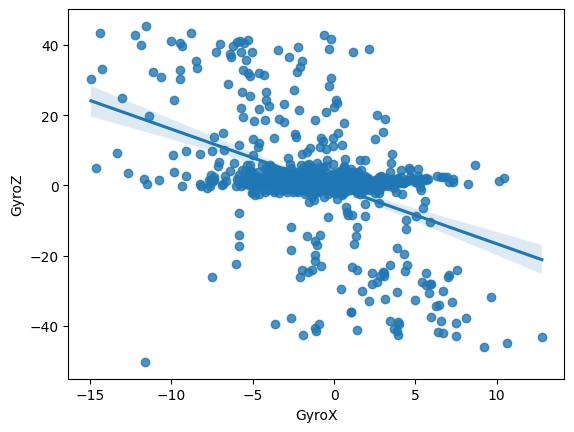

In [ ]:

# Dans ce data set, on a que des variables quantitatives. Dans ce cas, nous utiliserons seulement les analyses : corrélation, scatter plot, régression
var1 = df.columns[1]
var2 =df.columns[3]
# Corrélation
correlation = df_cleaned[[var1, var2]].corr()
print(correlation)

# Nuage de points (scatter plot)
sns.scatterplot(x=df[var1], y=df[var2])
plt.show()

# Régression linéaire si variables linéaires
sns.regplot(x=df[var1], y=df[var2])
plt.show()

VI. Analyse Multivariée

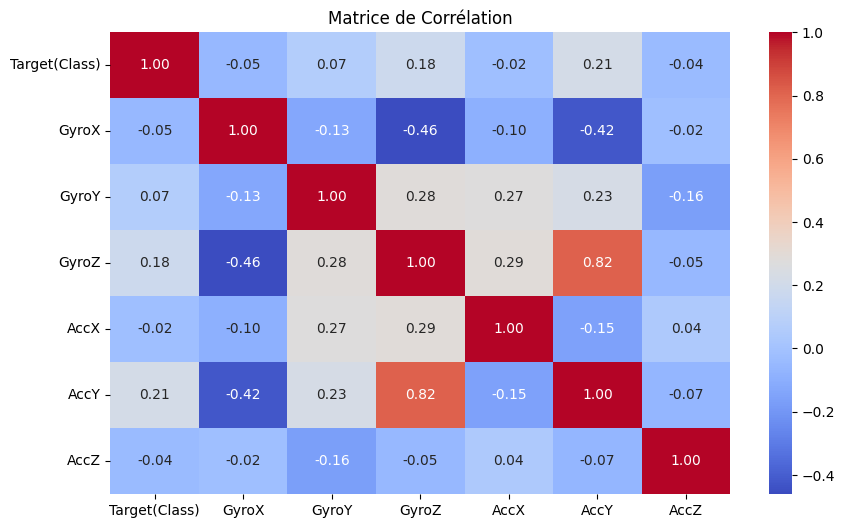

Score R² du modèle : 0.03225385095016242


In [ ]:
# Matrice de corrélation

correlation_matrix = df.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Régression multiple

# Séparation des variables explicatives (X) et de la variable cible (y)
X = df[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]  # Variables prédictives
y = df['Target(Class)']  # Variable à prédire

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print("Score R² du modèle :", model.score(X_test, y_test))



VII. Feature Engineering

In [12]:
"""# Calcul de la norme d'accélération
ACC = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)

# Calcul de la norme du Gyro
GYRO = np.sqrt(df['GyroX']**2 + df['GyroY']**2 + df['GyroZ']**2)

# Ajout des nouvelles colonnes au DataFrame
df['ACC'] = ACC
df['GYRO'] = GYRO

# Calcul de la moyenne de l'accélération et gyro
mean_ACC = df_cleaned['ACC'].mean()
mean_GYRO = df_cleaned['GYRO'].mean()

# Calcul de la médiane
median_ACC = df_cleaned['ACC'].median()
median_GYRO = df_cleaned['GYRO'].median()

# Calcul de la variance
var_ACC = df_cleaned['ACC'].var()
var_GYRO = df_cleaned['GYRO'].var()

# Différence entre 2 valeurs d'accélération
diff_ACC = df_cleaned['ACC'].diff()

# Différence entre 2 valeurs de Gyro
diff_GYRO = df_cleaned['GYRO'].diff()

# Calcul du minimum de l'accélération et Gyro
min_ACC = df_cleaned['ACC'].min()
min_GYRO = df_cleaned['GYRO'].min()

# Calcul du maximum de l'accélération et Gyro
max_ACC = df_cleaned['ACC'].max()
max_GYRO = df_cleaned['GYRO'].max()
min_ACC = df_cleaned['ACC'].min()
min_GYRO = df_cleaned['GYRO'].min()

# Calcul de la somme de l'accélération et Gyro
sum_ACC = df_cleaned['ACC'].sum()
sum_GYRO = df_cleaned['GYRO'].sum()

# Ratio de deux accélérations par axe
ratio_ACC_XY = df_cleaned['AccX'] / df_cleaned['AccY']
ratio_ACC_YZ = df_cleaned['AccY'] / df_cleaned['AccZ']
ratio_ACC_ZX = df_cleaned['AccZ'] / df_cleaned['AccX']
ratio_ACC_ZY = df_cleaned['AccZ'] / df_cleaned['AccY']
ratio_ACC_XZ = df_cleaned['AccX'] / df_cleaned['AccZ']
ratio_ACC_YX = df_cleaned['AccY'] / df_cleaned['AccX']"""

# Pour la suite, on utilisera le fichier features_14 étant le résultat d'un feature engineering assez poussé

df_features = pd.read_csv('features_14.csv')

df_features.head(100)

# Normalisation des données du fichier features_14

normalisation = StandardScaler()
donnees_normalisees = normalisation.fit_transform(df_features)

# passage array vers DataFrame
donnees_normalisees_df = pd.DataFrame(donnees_normalisees, columns=df_features.columns)

donnees_normalisees_df.head()

# Analyse en Composante Principale (ACP)

ACP=PCA(n_components=0.92)
donnees_ACP=ACP.fit_transform(donnees_normalisees)

# passage array vers DataFrame
donnees_ACP_df = pd.DataFrame(donnees_ACP)
donnees_ACP_df.head()

 # L'ACP se fait à 92% d'inertie comme indiqué dans le cours car c'est une solution optimisé
# Pour la classification, faire les matrices de confusions pour regarder si c'est bien fait et regarder l'accuracy
# Il faut faire une présentation classique pour l'oral, comme si c'était un projet classique


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-5.592027,0.562966,-4.582627,-1.332132,5.382180,-0.399496,-2.528079,-1.712868,-2.903967,-0.523243,-0.882535,-1.141383,-2.312119,0.788167,-0.572435,2.178153,3.788161,1.033503
1,-5.575333,0.022073,-3.239415,-1.418821,5.453275,0.406425,-2.460745,-0.323290,-1.899059,0.659851,-3.121083,-1.802709,0.016268,1.590339,0.228336,1.837900,2.995174,2.235105
2,-5.434789,0.015933,-3.170703,-1.656449,5.493837,0.155889,-2.367575,-0.850530,-1.059378,0.670988,-2.146712,-1.628892,-0.928807,1.709388,0.690878,2.175741,2.455158,1.566651
3,-4.917836,0.455448,-2.230318,-2.085504,5.427256,0.246668,0.717364,0.789572,-1.508906,2.367249,-1.718043,0.194613,-0.885454,2.266224,-1.120280,2.024280,1.797270,1.622868
4,-4.914453,0.742347,-2.288001,-2.071584,5.130916,0.049690,1.237986,0.845000,-0.882720,1.970907,-1.249480,0.237877,-0.498385,2.451955,-1.184153,1.919686,1.362623,1.326301


VIII. Modélisation

In [19]:
X = donnees_ACP  # Features
y = df_features['Target'] # Target

# Division en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

"""# Normalisation pour modélisation

normalise = StandardScaler()
X_train_normalise = normalise.fit_transform(X_train)
X_test_normalise = normalise.transform(X_test)

# ACP pour modélisation

ACP = PCA(n_components=0.92)
X_train_ACP = ACP.fit_transform(X_train_normalise)
X_test_ACP = ACP.transform(X_test_normalise)"""

# Convertir en DataFrame pour visualisation
X_test_ACP_df = pd.DataFrame(X_test_ACP)
print("5 premières lignes de l'ensemble de test après ACP :")
X_test_ACP_df.head()

5 premières lignes de l'ensemble de test après ACP :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.080549,-1.564790,0.413506,0.182951,0.101774,0.287501,0.739276,-1.098236,-1.153505,0.852522,0.548582,-0.293821,-0.289463,-0.940972,0.120446,0.778084,0.327243
1,0.488623,-0.170230,0.566955,-0.037193,0.004488,0.118049,-0.532076,-0.987250,-0.297923,0.774735,0.610862,-0.709883,0.313861,0.580751,0.340353,-0.068507,-2.446937
2,-1.601502,-0.314361,0.466371,1.390130,-2.498310,-0.997717,-0.539605,-0.995761,0.116731,3.048045,0.886683,-0.252571,2.389496,0.230707,-0.724160,-0.097183,0.095880
3,1.012883,0.144364,0.023124,-1.292429,-0.270840,-0.057783,1.494192,-0.711440,0.705724,-1.247419,1.135216,1.428309,0.150783,-0.295423,-0.475665,-0.476645,1.074465
4,0.168623,0.688257,-0.569233,-0.192634,0.481938,0.474996,-0.468464,-0.696822,-0.027136,-2.182646,-0.512023,-0.343485,1.425294,-0.022485,0.494913,0.422405,-1.148250


Rapport pour Arbre de décision :
              precision    recall  f1-score   support

           1       0.92      0.88      0.90        50
           2       0.94      0.89      0.92        57
           3       0.89      0.90      0.89        70
           4       0.83      0.91      0.87        44

    accuracy                           0.90       221
   macro avg       0.90      0.90      0.90       221
weighted avg       0.90      0.90      0.90       221

Rapport pour Forêt aléatoire :
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        50
           2       0.98      0.98      0.98        57
           3       0.97      1.00      0.99        70
           4       1.00      0.98      0.99        44

    accuracy                           0.99       221
   macro avg       0.99      0.98      0.99       221
weighted avg       0.99      0.99      0.99       221

Rapport pour SVM :
              precision    recall  f1-score   s

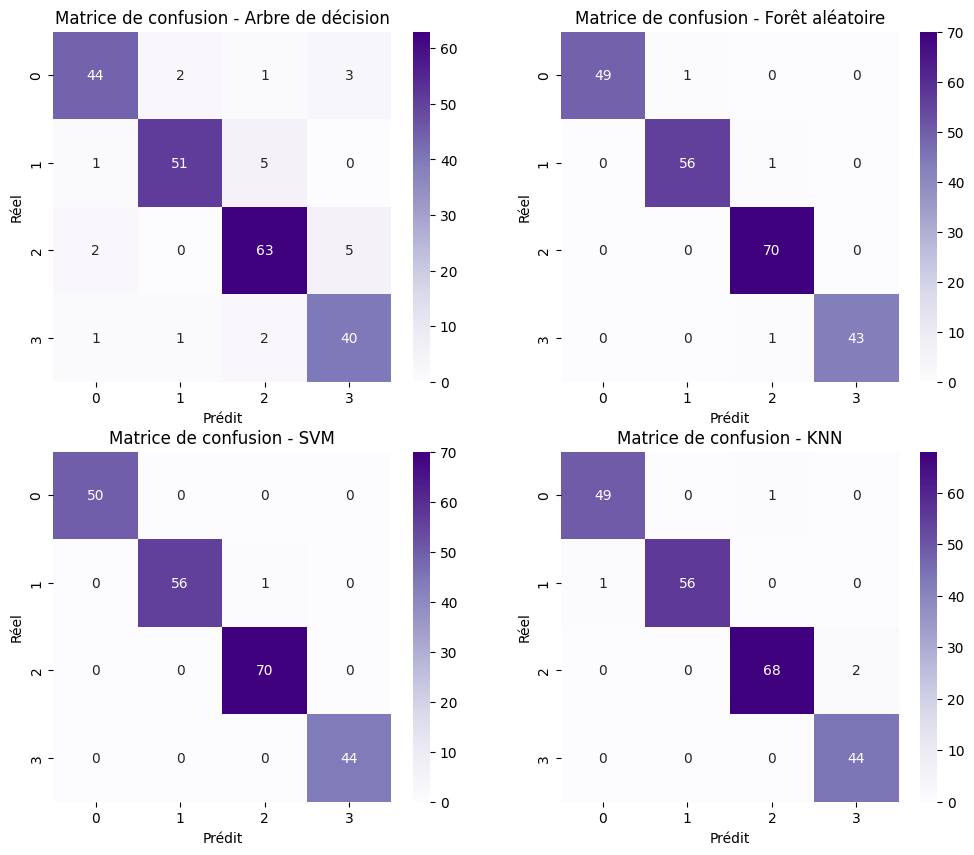

In [20]:
#Initialisation des modèles

modele_arbre = DecisionTreeClassifier(random_state=64)
modele_rf = RandomForestClassifier(random_state=64)
modele_svm = SVC(random_state=64)
modele_knn = KNeighborsClassifier()

# Entrainement des modèles

modele_arbre.fit(X_train_ACP, y_train)
modele_rf.fit(X_train_ACP, y_train)
modele_svm.fit(X_train_ACP, y_train)
modele_knn.fit(X_train_ACP, y_train)

# Prédictions sur l'ensemble de test

y_pred_arbre = modele_arbre.predict(X_test_ACP)
y_pred_rf = modele_rf.predict(X_test_ACP)
y_pred_svm = modele_svm.predict(X_test_ACP)
y_pred_knn = modele_knn.predict(X_test_ACP)

# Rapports de classification et Accuracy

print("Rapport pour Arbre de décision :")
print(classification_report(y_test, y_pred_arbre))

print("Rapport pour Forêt aléatoire :")
print(classification_report(y_test, y_pred_rf))

print("Rapport pour SVM :")
print(classification_report(y_test, y_pred_svm))

print("Rapport pour KNN :")
print(classification_report(y_test, y_pred_knn))

print("Accuracy précise Arbre de décision :", accuracy_score(y_test, y_pred_arbre))

print("Accuracy précise Forêt aléatoire :", accuracy_score(y_test, y_pred_rf))

print("Accuracy précise SVM :", accuracy_score(y_test, y_pred_svm))

print("Accuracy précise KNN :", accuracy_score(y_test, y_pred_knn))

# Calcul et affichage des matrices de confusion pour chaque modèle

cm_arbre = confusion_matrix(y_test, y_pred_arbre)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Matrice de confusion pour l'arbre de décision

sns.heatmap(cm_arbre, annot=True, fmt='d', cmap='Purples', ax=axes[0, 0])
axes[0, 0].set_title('Matrice de confusion - Arbre de décision')
axes[0, 0].set_xlabel('Prédit')
axes[0, 0].set_ylabel('Réel')

# Matrice de confusion pour la forêt aléatoire

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', ax=axes[0, 1])
axes[0, 1].set_title('Matrice de confusion - Forêt aléatoire')
axes[0, 1].set_xlabel('Prédit')
axes[0, 1].set_ylabel('Réel')

# Matrice de confusion pour SVM

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', ax=axes[1, 0])
axes[1, 0].set_title('Matrice de confusion - SVM')
axes[1, 0].set_xlabel('Prédit')
axes[1, 0].set_ylabel('Réel')

# Matrice de confusion pour KNN

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Matrice de confusion - KNN')
axes[1, 1].set_xlabel('Prédit')
axes[1, 1].set_ylabel('Réel')

plt.show()

Si vous connaissez déjà Colab, regardez cette vidéo pour découvrir les tables interactives, l'affichage de l'historique du code exécuté et la palette de commandes.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  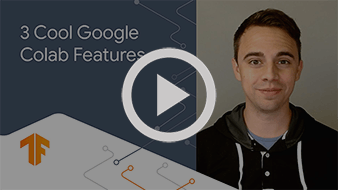
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Qu'est-ce que Colab ?</h2>
</div>

Colab &#40;ou "Colaboratory"&#41; vous permet d'écrire et d'exécuter du code Python dans votre navigateur avec
- Aucune configuration requise
- Accès sans frais aux GPU
- Partage facile

Que vous soyez <strong>étudiant</strong>, <strong>data scientist</strong> ou <strong>chercheur en IA</strong>, Colab peut vous simplifier la tâche. Regardez la <a href="https://www.youtube.com/watch?v=inN8seMm7UI">présentation de Colab</a> pour en savoir plus ou commencez tout de suite.

<div class="markdown-google-sans">

## <strong>Premiers pas</strong>
</div>

Le document que vous consultez n'est pas une page Web statique, mais un environnement interactif appelé <strong>notebook Colab</strong>, qui vous permet d'écrire et d'exécuter du code.

Voici par exemple une <strong>cellule de code</strong> avec un bref script en Python qui calcule une valeur, l'enregistre dans une variable et imprime le résultat :

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Pour exécuter le code dans la cellule ci-dessus, sélectionnez-le en cliquant dessus, puis cliquez sur le bouton de lecture à gauche du code ou utilisez le raccourci clavier Commande/Ctrl+Entrée. Pour modifier le code, cliquez simplement sur la cellule.

Les variables que vous définissez dans une cellule peuvent être utilisées par la suite dans d'autres cellules :

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Les notebooks Colab vous permettent d'utiliser, dans un même document, du <strong>code exécutable</strong>, du <strong>texte enrichi</strong>, des <strong>images</strong>, du code <strong>HTML</strong>, du code <strong>LaTeX</strong> et bien plus. Lorsque vous créez des notebooks Colab, ils sont enregistrés dans votre compte Google Drive. Vous pouvez facilement les partager avec vos collaborateurs ou vos amis, qui peuvent alors y apporter des commentaires ou même les modifier. Pour en savoir plus, consultez la page <a href="/notebooks/basic_features_overview.ipynb">Présentation de Colaboratory</a>. Pour créer un notebook Colab, utilisez le menu "Fichier" ci-dessus ou le lien <a href="http://colab.research.google.com#create=true">Créer un notebook Colab</a>.

Les notebooks Colab sont des notebooks Jupyter hébergés par Colab. Pour en savoir plus sur le projet Jupyter, consultez le site Web <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Science des données
</div>

Colab vous permet de tirer pleinement parti des bibliothèques populaires Python pour analyser et visualiser des données. La cellule de code ci-dessous utilise <strong>numpy</strong> pour générer des données aléatoires et <strong>matplotlib</strong> pour les visualiser. Pour modifier le code, cliquez simplement sur la cellule.

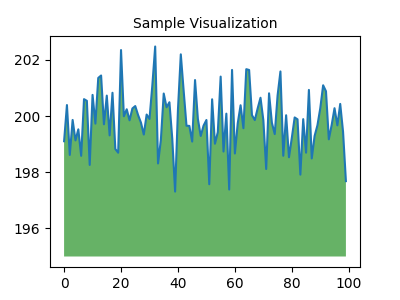

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Vous pouvez importer vos propres données dans les notebooks Colab depuis votre compte Google Drive, y compris depuis des feuilles de calcul, ainsi que depuis GitHub et de nombreuses autres sources. Pour en savoir plus sur l'importation de données et l'utilisation de Colab dans le domaine de la science des données, consultez les liens ci-dessous dans la section <a href="#working-with-data">Utiliser les données</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Colab vous permet d'importer un ensemble de données d'images, d'entraîner un classificateur d'images sur cet ensemble et d'évaluer le modèle, tout cela avec <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">quelques lignes de code</a>. Les notebooks Colab exécutent ce code sur les serveurs cloud de Google. Vous avez donc à votre disposition toute la puissance du matériel Google, y compris les <a href="#using-accelerated-hardware">GPU et TPU</a>, quelle que soit la puissance de votre ordinateur. Vous n'avez besoin que d'un navigateur.

Colab est très largement utilisé par la communauté du machine learning, par exemple dans les applications suivantes :
- Premiers pas avec TensorFlow
- Développement et entraînement de réseaux de neurones
- Expérimentation avec les TPU
- Dissémination de la recherche en IA
- Création de tutoriels

Pour voir comment les notebooks Colab sont utilisés dans des applications de machine learning, reportez-vous aux <a href="#machine-learning-examples">exemples de machine learning</a> ci-dessous.

<div class="markdown-google-sans">

## Autres ressources

### Utiliser les notebooks dans Colab

</div>

- [Présentation de Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide de Markdown](/notebooks/markdown_guide.ipynb)
- [Importer des bibliothèques et installer des dépendances](/notebooks/snippets/importing_libraries.ipynb)
- [Enregistrer et charger des notebooks dans GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulaires interactifs](/notebooks/forms.ipynb)
- [Widgets interactifs](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Utiliser les données
</div>

- [Chargement de données : Drive, Sheets et Google Cloud Storage](/notebooks/io.ipynb)
- [Graphiques : visualiser les données](/notebooks/charts.ipynb)
- [Premiers pas avec BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Cours d'initiation au Machine Learning

<div>

Vous trouverez ci-dessous quelques-uns des notebooks de la formation Google en ligne sur le machine learning. Consultez la <a href="https://developers.google.com/machine-learning/crash-course/">formation complète en ligne</a> pour en savoir plus.
- [Présentation du DataFrame pandas](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Régression linéaire avec tf.keras et des données synthétiques](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Utiliser le matériel accéléré
</div>

- [TensorFlow avec des GPU](/notebooks/gpu.ipynb)
- [TensorFlow avec des TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Échange de voix avec NeMo</a> : utilisez le kit Nvidia NeMo pour l'IA conversationnelle afin d'échanger une voix dans un fragment audio contre une voix générée par ordinateur.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Recyclage d'un classificateur d'images</a> : construisez un modèle Keras sur un classificateur d'images pré-entraîné pour faire la distinction entre différentes fleurs.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classification de texte</a> : classez des avis sur des films provenant de la base de données IMDB comme <em>positifs</em> ou <em>négatifs</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfert de style</a> : utilisez le deep learning pour transférer un style d'une image à une autre.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Questions/Réponses sur l'encodeur de phrases universel multilingue</a> : utilisez un modèle de machine learning afin de répondre aux questions issues de l'ensemble de données SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolation vidéo</a> : prédisez ce qui s'est passé entre la première et la dernière image d'une vidéo.
